In [ ]:
#Importing libraries

import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# import os
# Ignore the warning.
import warnings
warnings.filterwarnings('ignore')


In [16]:
#image data generators for training and validation.
num_classes = 2
img_rows, img_cols = 180, 180
batch_size = 16
epochs = 25

#from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir ="D:\DATASET\DATASET\TRAIN"
validation_data_dir = "D:\DATASET\DATASET\TEST"

#The generators apply a rescale transformation to the images and fill any gaps using the 'reflect' method.
# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 

#image data generators for training and validation.
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [17]:
print("Train/Validation indicies: ", train_generator.class_indices)
print("\n0 Stands for Organic \"O\", and 1 stands for Non-Organic \"R\"")

Train/Validation indicies:  {'O': 0, 'R': 1}

0 Stands for Organic "O", and 1 stands for Non-Organic "R"


In [18]:
model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))



model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 180, 180, 8)       224       
                                                                 
 activation_7 (Activation)   (None, 180, 180, 8)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 8)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 90, 90, 8)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 16)        1168      
                                                                 
 activation_8 (Activation)   (None, 90, 90, 16)        0         
                                                      

In [19]:
# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
from tensorflow.keras.optimizers import Nadam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                      
checkpoint = ModelCheckpoint("D:\DATASET\DATASET\ProjectG.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
                                    
    
earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,  #Abs value and is the main change required before we stop
                          patience = 10, #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 10,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Nadam',#(lr = 0.001),   #lr= learning rate
              metrics = ['accuracy'])

nb_train_samples = 22564  
nb_validation_samples = 2513  
epochs = 20

#Training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/20
1410/1410 [==============================] - ETA: 0s - loss: 0.4477 - accuracy: 0.8013
Epoch 1: val_loss improved from inf to 0.33441, saving model to D:\DATASET\DATASET\ProjectG.h5
1410/1410 [==============================] - 266s 187ms/step - loss: 0.4477 - accuracy: 0.8013 - val_loss: 0.3344 - val_accuracy: 0.8873 - lr: 0.0010
Epoch 2/20
1410/1410 [==============================] - ETA: 0s - loss: 0.3781 - accuracy: 0.8420
Epoch 2: val_loss did not improve from 0.33441
1410/1410 [==============================] - 165s 117ms/step - loss: 0.3781 - accuracy: 0.8420 - val_loss: 0.3954 - val_accuracy: 0.8392 - lr: 0.0010
Epoch 3/20
1410/1410 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.8557
Epoch 3: val_loss improved from 0.33441 to 0.31605, saving model to D:\DATASET\DATASET\ProjectG.h5
1410/1410 [==============================] - 164s 116ms/step - loss: 0.3517 - accuracy: 0.8557 - val_loss: 0.3160 - val_accuracy: 0.8702 - lr: 0.0010
Epoch 4/20
1410

In [20]:
model.save("D:\DATASET\DATASET\ProjectGreen.h5")

In [21]:
history.history

{'loss': [0.4476943016052246,
  0.3780975639820099,
  0.35174560546875,
  0.3302566707134247,
  0.30856138467788696,
  0.29169026017189026,
  0.2758393883705139,
  0.2616865038871765,
  0.24401529133319855,
  0.2275545448064804,
  0.2082500457763672,
  0.19333796203136444,
  0.1736941784620285,
  0.1604170799255371,
  0.14532731473445892,
  0.13624784350395203,
  0.1282574087381363,
  0.11632529646158218,
  0.10768978297710419],
 'accuracy': [0.8013127446174622,
  0.842025876045227,
  0.8556856513023376,
  0.8656200170516968,
  0.8756430745124817,
  0.8821181654930115,
  0.8891697525978088,
  0.8948022127151489,
  0.9053131341934204,
  0.9098367691040039,
  0.9183962941169739,
  0.9249600768089294,
  0.9341405034065247,
  0.9391964077949524,
  0.946868896484375,
  0.9485985636711121,
  0.9512152075767517,
  0.9563153982162476,
  0.9605730175971985],
 'val_loss': [0.334410160779953,
  0.395417183637619,
  0.31604745984077454,
  0.26645222306251526,
  0.3039010465145111,
  0.269681662321

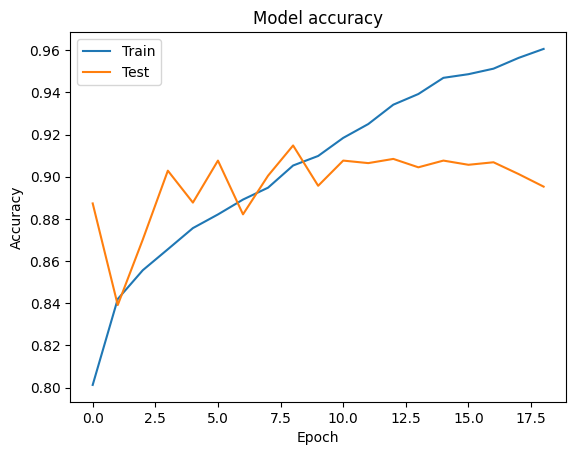

In [22]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



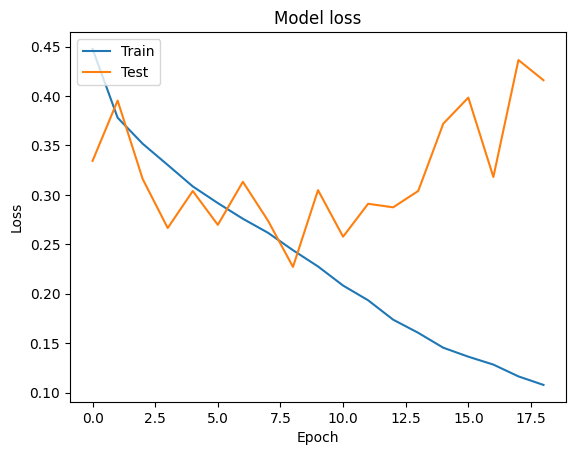

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [46]:
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
from keras.models import load_model
#Confution Matrix and Classification Report
class_labels = {0:'O', 1:'R'}


Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))




Confusion Matrix
[[1290  111]
 [ 103 1009]]
Classification Report
              precision    recall  f1-score   support

           O       0.93      0.92      0.92      1401
           R       0.90      0.91      0.90      1112

    accuracy                           0.91      2513
   macro avg       0.91      0.91      0.91      2513
weighted avg       0.91      0.91      0.91      2513



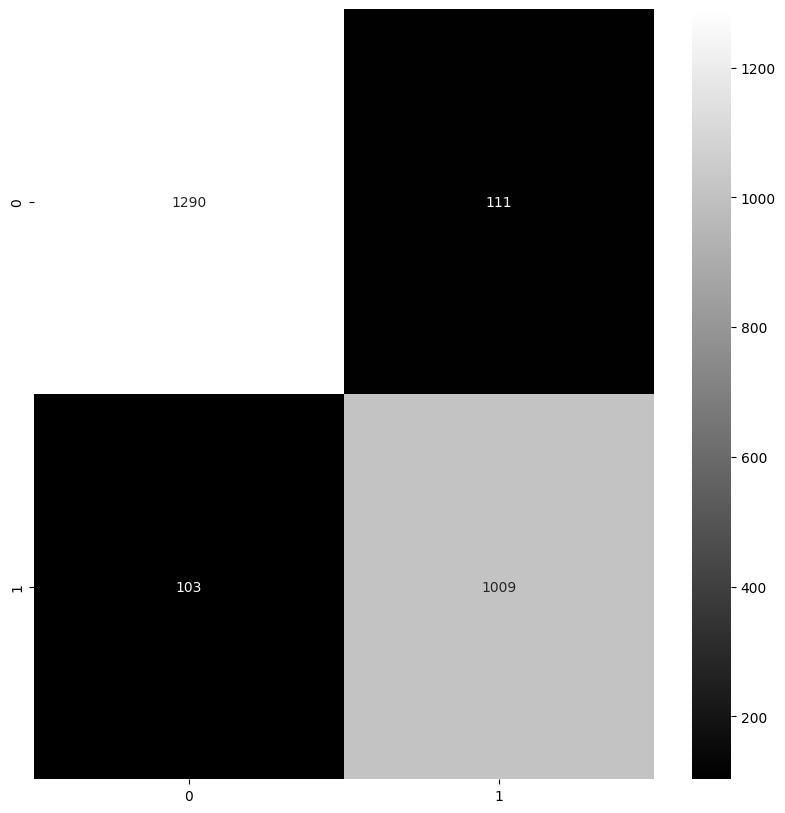

In [41]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
import seaborn as sns
img_row, img_height, img_depth = 150,150,3
model = load_model("D:\DATASET\DATASET\ProjectGreen.h5")

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 22564
nb_validation_samples = 2513

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(10,10))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='gray')
plt.show()



In [47]:
#Testing
model.load_weights("D:\DATASET\DATASET\ProjectGreen.h5")
model.evaluate(validation_generator);

158/158 [==============================] - 6s 37ms/step - loss: 0.2270 - accuracy: 0.9148


1/1 [==============================] - 0s 167ms/step
[[0.00151664 0.99848336]]
this is Non-Organic


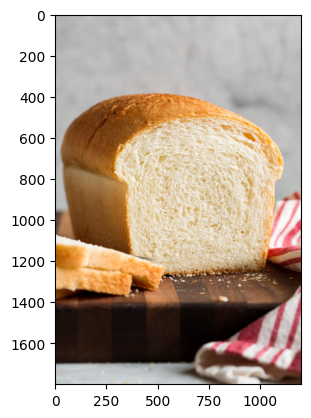

In [12]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img


#Testing out Images
image_path = r"D:\DATASET\DATASET\bread-recipe-1.jpg"


model = tensorflow.keras.models.load_model("D:\DATASET\DATASET\ProjectGreen.h5")
test_image = load_img(image_path,target_size = (180,180,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print(result)
if result[0][0] == 1:
  print("This is Organic")
else:
  print("this is Non-Organic")
  # reading the image
testImage = img.imread(image_path)
 
# displaying the modified image
plt.imshow(testImage)